### Using 'Live' Financial Data

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# for the actual data....
import yfinance # you may need to  pip install yfinance



In [48]:
# some dummy data
serA = np.arange(1,100)
serB = np.arange(100,200)
serB

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199])

In [49]:
df = pd.DataFrame([serA, serB]).T
df.describe()
df.sum()
df.mean()
# we have useful accumulators...
df.cumsum()
df.cumprod()

,0,1
0,1.000000e+00,1.000000e+02
1,2.000000e+00,1.010000e+04
2,6.000000e+00,1.030200e+06
3,2.400000e+01,1.061106e+08
4,1.200000e+02,1.103550e+10
...,...,...
95,9.916779e+149,2.777246e+207
96,9.619276e+151,5.443403e+209
97,9.426890e+153,1.072350e+212
98,9.332622e+155,2.123254e+214


In [50]:
df.diff()
df.skew()
df.kurt()
df.quantile(q=[0.25, 0.5, 0.75])

,0,1
0.25,25.5,124.75
0.50,50.0,149.50
0.75,74.5,174.25


### Apply Functions to DataFrame

In [51]:
def makeDF():
    cols = ['A', 'B', 'C']
    rows = ['Row 1', 'Row 2', 'Row 3', 'Row 4']
    data = np.arange(12).reshape(4,3) # create an array shaped 4 by 3
    return pd.DataFrame(data=data, columns=cols, index=rows)

df = makeDF()
df

,A,B,C
Row 1,0,1,2
Row 2,3,4,5
Row 3,6,7,8
Row 4,9,10,11


In [52]:
def customSum(n):
    return n.sum()

# apply this function to every row of the dataframe
df['Result'] = df[['A', 'B', 'C']].apply(customSum, axis=1) # axis=1 memans ACROSS rows
df

,A,B,C,Result
Row 1,0,1,2,3
Row 2,3,4,5,12
Row 3,6,7,8,21
Row 4,9,10,11,30


In [53]:
# we can use our function DOWN the columns
df = makeDF() # a new fresh DataFrame
# iloc is index locatio, loc is 'name' location
df.loc['Result Columns'] = df.apply(customSum, axis=0)
df


,A,B,C
Row 1,0,1,2
Row 2,3,4,5
Row 3,6,7,8
Row 4,9,10,11
Result Columns,18,22,26


### Using Yahoo Finance for real Data

In [54]:
import yfinance # may need to pip isntall

C:\Users\rb17\AppData\Local\Temp\ipykernel_24724\25131966.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  f_sp500 = yfinance.download(tickers='^GSPC', start='2000-1-1')['Close'].copy()
[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

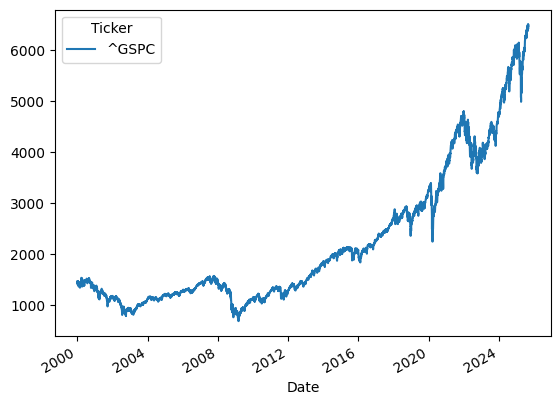

In [55]:
f_sp500 = yfinance.download(tickers='^GSPC', start='2000-1-1')['Close'].copy()
f_sp500.plot()

C:\Users\rb17\AppData\Local\Temp\ipykernel_24724\843648462.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_stocks = yfinance.download(tickers='IBM AAPL F', start='2000-1-1')['Close'].copy()
[*********************100%***********************]  3 of 3 completed


<Axes: xlabel='Date'>

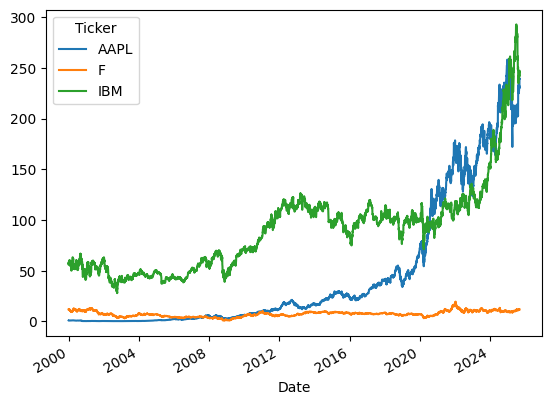

In [56]:
# load some stocks
df_stocks = yfinance.download(tickers='IBM AAPL F', start='2000-1-1')['Close'].copy()
df_stocks.plot()

<Axes: xlabel='Date'>

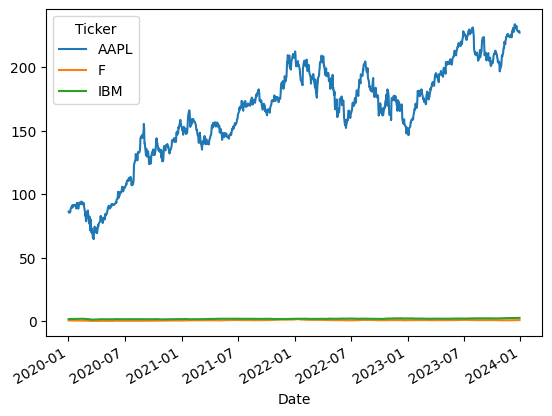

In [57]:
#Normalize the prices
df_sp500_norm = df_stocks/df_stocks.iloc[0]
# we can choose which years to show
df_sp500_norm['2020':'2023'].plot()

<Axes: xlabel='Date'>

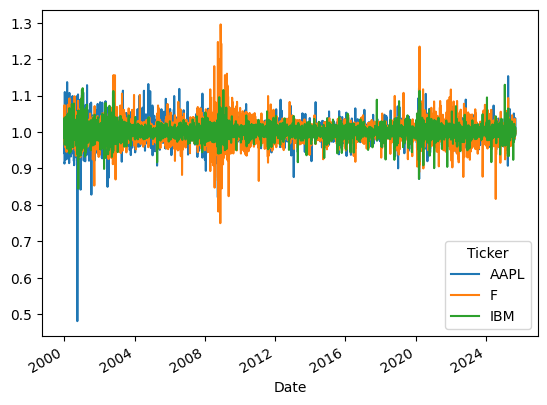

In [58]:
# A more realistic approach is to use a moving ratio
df_stocks_dailyReturn = df_stocks/df_stocks.shift(1)
df_stocks_dailyReturn.plot()

<Axes: xlabel='Date'>

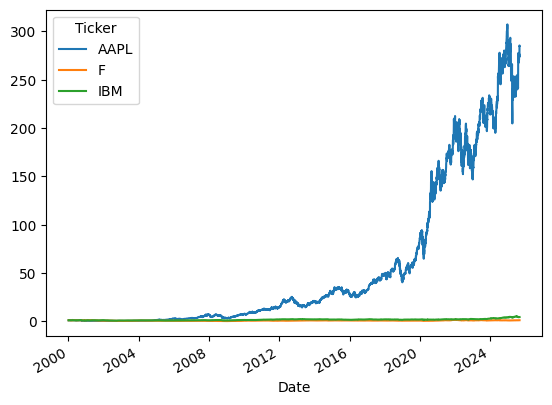

In [59]:
# explore the cumulative profitability
df_stocks_dailyReturn.cumprod().plot()